---
---

# **1 - Decision Trees**

Decision Tree Learning refers to the statistical modeling that uses a form of decision trees, where node splits are decided based on an information metric.

Fundamentally, decision trees and other tree based methods rely on the ability to **split** data based on **information** from features. This means we need a mathematical definition of **information** and the ability to measure it.

**Desicion Tree is easily interpretable by human but prone to Overfitting.**

---
**Decision Tree Terminology**

---

Recall our simple regression tree:

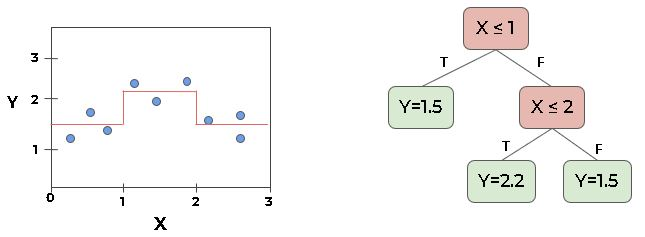

  1. Splitting:

    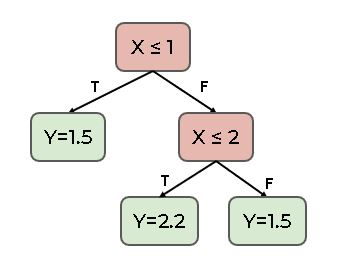 

  2. Nodes:

    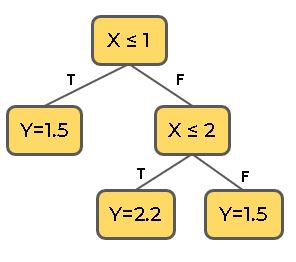

  3. Root Nodes:

    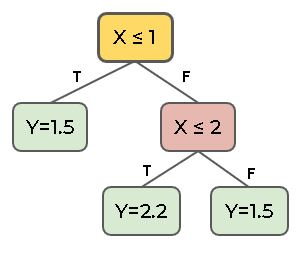

  4. Leaf (Terminal) Nodes:

    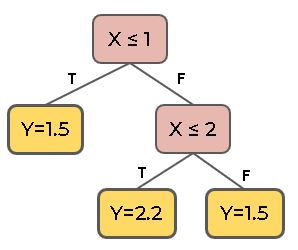

  5. Parent and Children Nodes:

    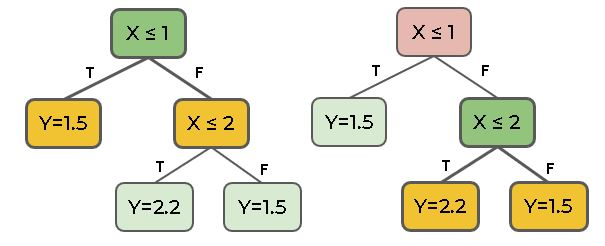

  6. Tree Branches (Sub Trees):

    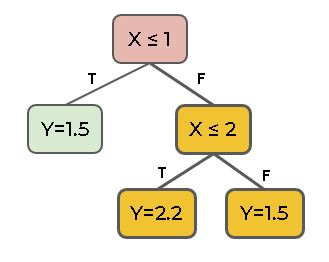

  7. Pruning:

    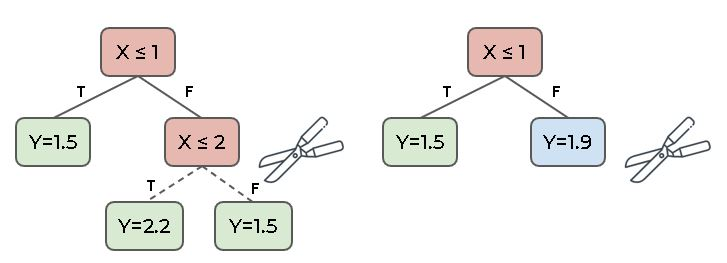

    The main ideo of pruning is to avoid overfitting.

---
**Gini Impurity**

---

Before we explore how **splitting criterion** is used in constructing decision trees, lets explore the most common information measurement for desicion trees, **gini impurity**.

**Gini impurity** is a mathematical measurement of how **pure** the information in a data set is. In regards to classification, we can think of this as a **measurement** of class **uniformity**.

**Gini Impurity for Classification:**

For a set of classes **C** for a given dataset **Q**, $P_c$ is probability of class **C**

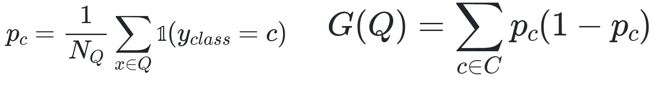

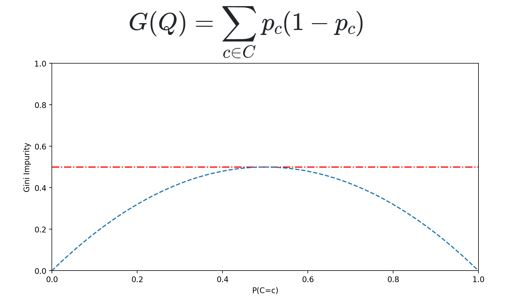

**"Maximum" Impurity Possible**

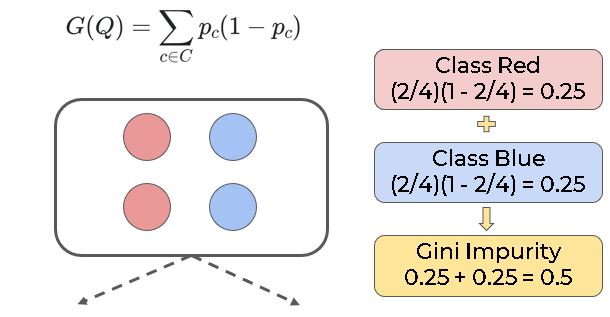

**Data is more "pure" (less impurity)**

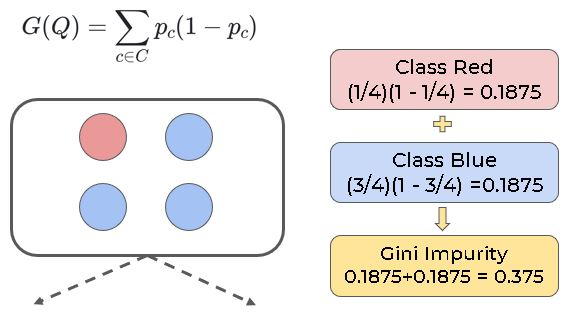

**Data is completely "pure" (no impurity)**

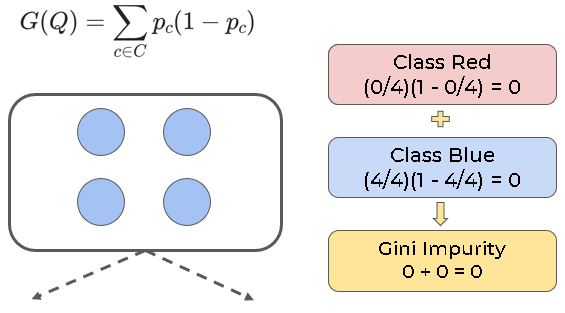

If the **goal** of a decision tree is to **separate** out classes, we can use **gini impurity** to decide on data split values. 

We want to **minimize** the **gini impurity** at leaf nodes. **Minimized** impurity at leaf nodes means we are separating classes **effectively**.

---
**How Decision Tree Works and Find the Best Root Nodes**

---

We start by exploring how a decision tree is constructed from a training data set using **gini impurity**.

When first constructing a tree, we need to decide what feature will be used as the **root node**. We can use **gini impurity** to compare the **information** contained within features for the training data.

---
**1. Binary Categorical Features**

**Predict if email is spam if is it contains a URL:**

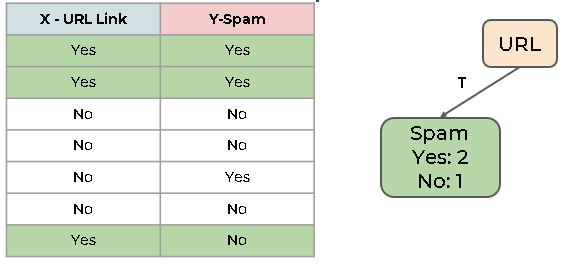

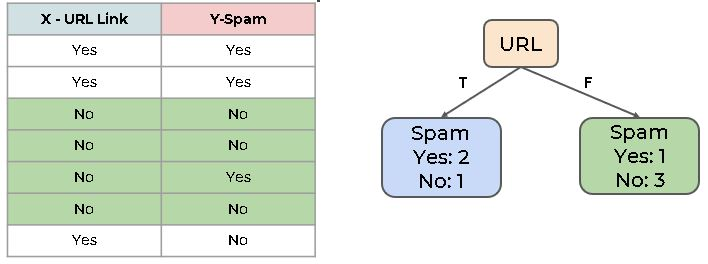

Recall the gini impurity formula, treat **Yes Spam** and **No Spam** as **C** classes:

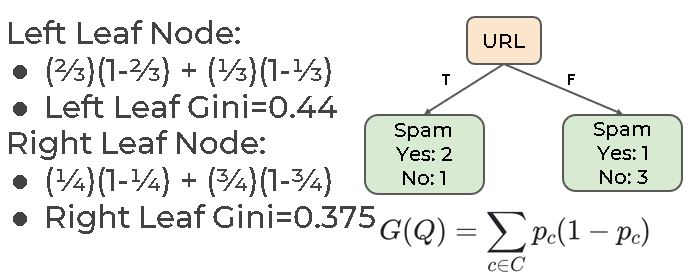

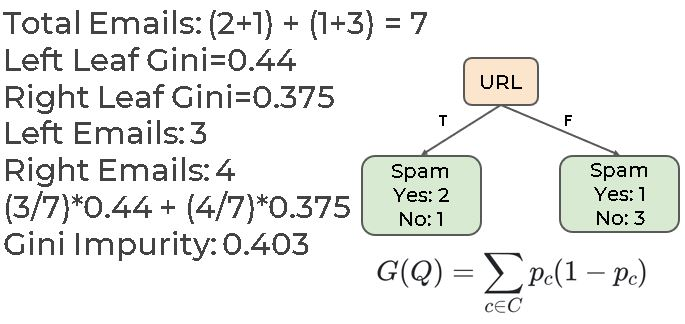

Gini impurity for URL feature is 0.403

We still have more issues to consider:

 * Multiple Features
 * Continous Features
 * Multi-categorical Features

We can incorporate the gini impurity to each of these issues to solve for best root nodes and best split parameters for leaves.

---
**2. Continous Features**

First, sort the data:

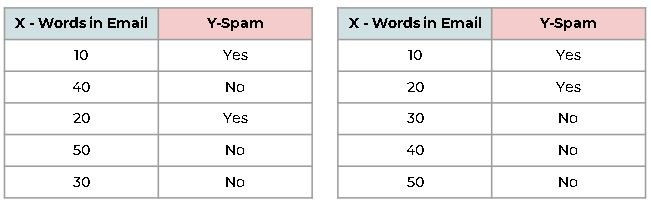

Use averages between rows as value:

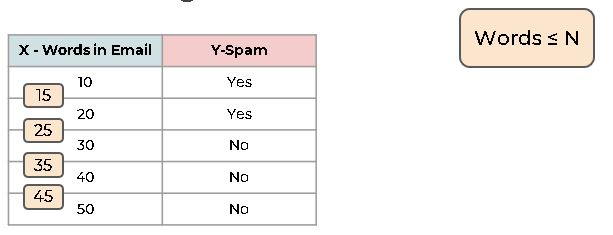

Calculate gini impurity for each split:

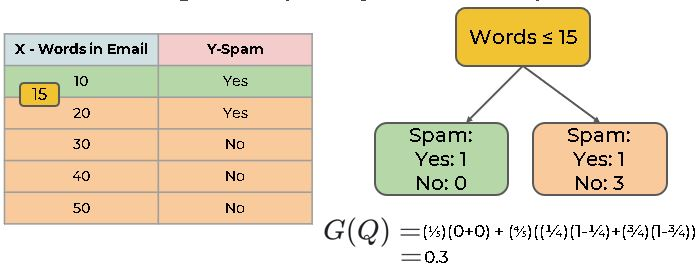

Repeat for all possible splits:

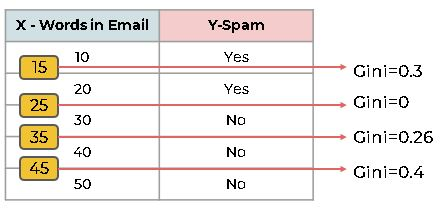

Choose lowest impurity as split value for node:

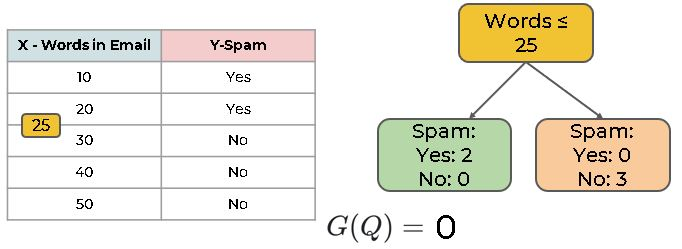

---
**3. Multi-Categorical Features**

Calculate all gini impurity for all combinations:

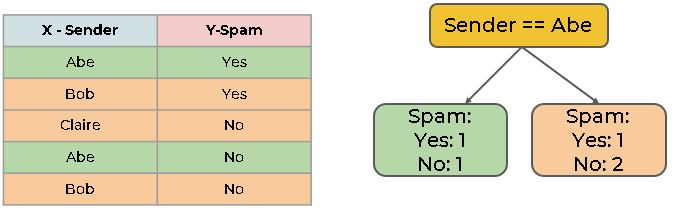



Choose lowest impurity split combination:

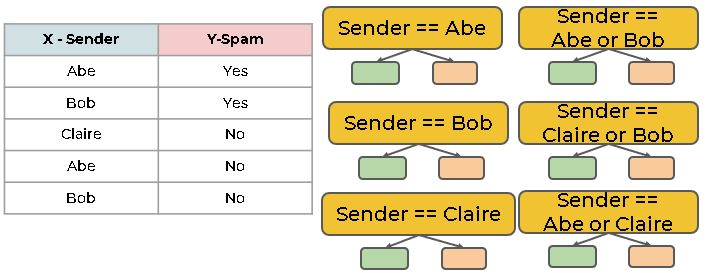

---
**Multi-Feature Data Set**

---

How does the decision tree decide on the **Root Node** of a multi-feature data set?

  1. Calculate the **gini impurity values of each features** and choose the **lowest impurity value to split** on first
  2. By choosing the feature with the **lowest gini impurity** in its **leaf nodes**, we are choosing the feature that **best splits** the data into **"pure" classes**.

---
**Impurity Threshold**

---

By using gini impurity as a measurement of the effectiveness of a node split, we can perform automatic feature selection by mandating an impurity threshold for an additional feature based split to occur.

A large overfitted tree:

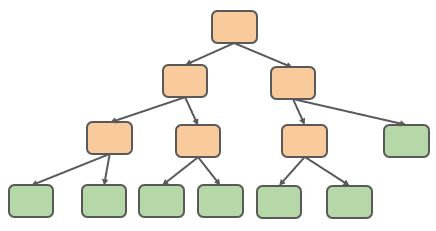

**Add minimum gini impurity decrease:**

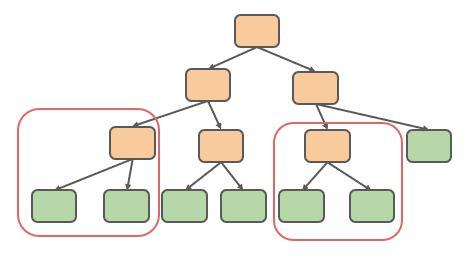

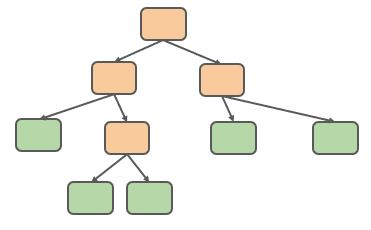

**We can also mandate a max depth:**

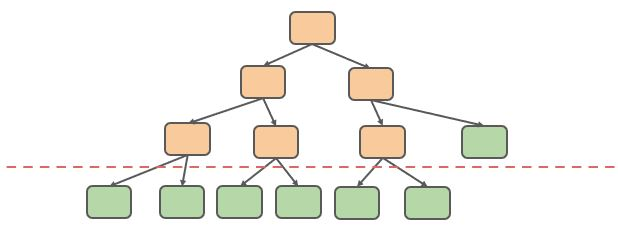

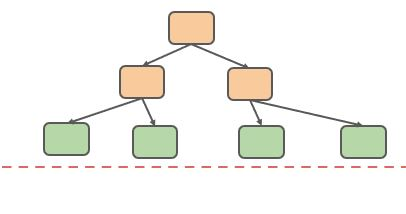

---

## **A. Data Set**

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/11_Decision_Tree/penguins_size.csv')

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

---

## **B. Exploratory Data Analysis and Feature Engineering**



### **a. Missing Data**

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

Because we only have 3% missing data, it is safe to drop the data.

---

#### **Drop the missing data**

In [ ]:
df = df.dropna() # drop rows that contains any missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
df.shape

(334, 7)

---

### **b. Impute Data**

In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


---

#### **Descriptive statistic of Gentoo species by sex**

In [ ]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

Based on data above, the '.' sex tends towards female sex

---

#### **Replace the Value**

In [ ]:
# df.at[index name, column name] = value
df.at[336, 'sex'] = 'FEMALE'

In [ ]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

'.' sex successfully changed

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

---

### **c. Label Count**

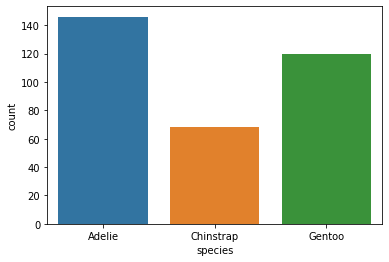

In [ ]:
sns.countplot(x='species', data=df);

In [ ]:
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

---

### **c. Features Correlation**

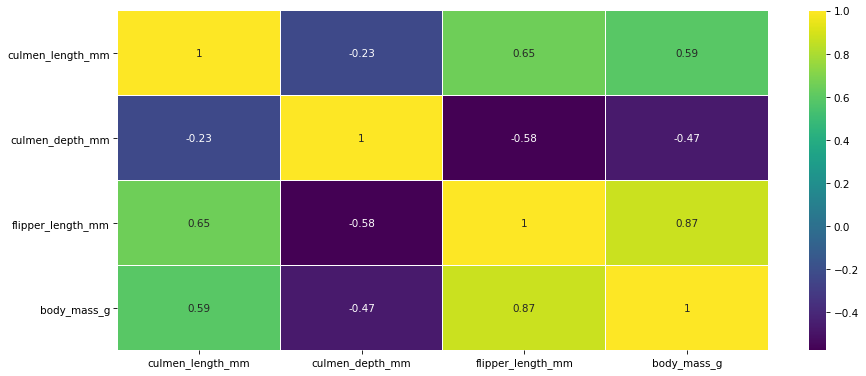

In [ ]:
plt.figure(figsize=(14,6),dpi=75)
sns.heatmap(df.corr(), annot=True, lw=0.1, cmap='viridis');

The correlation between each features

---

### **d. Features Relationship**

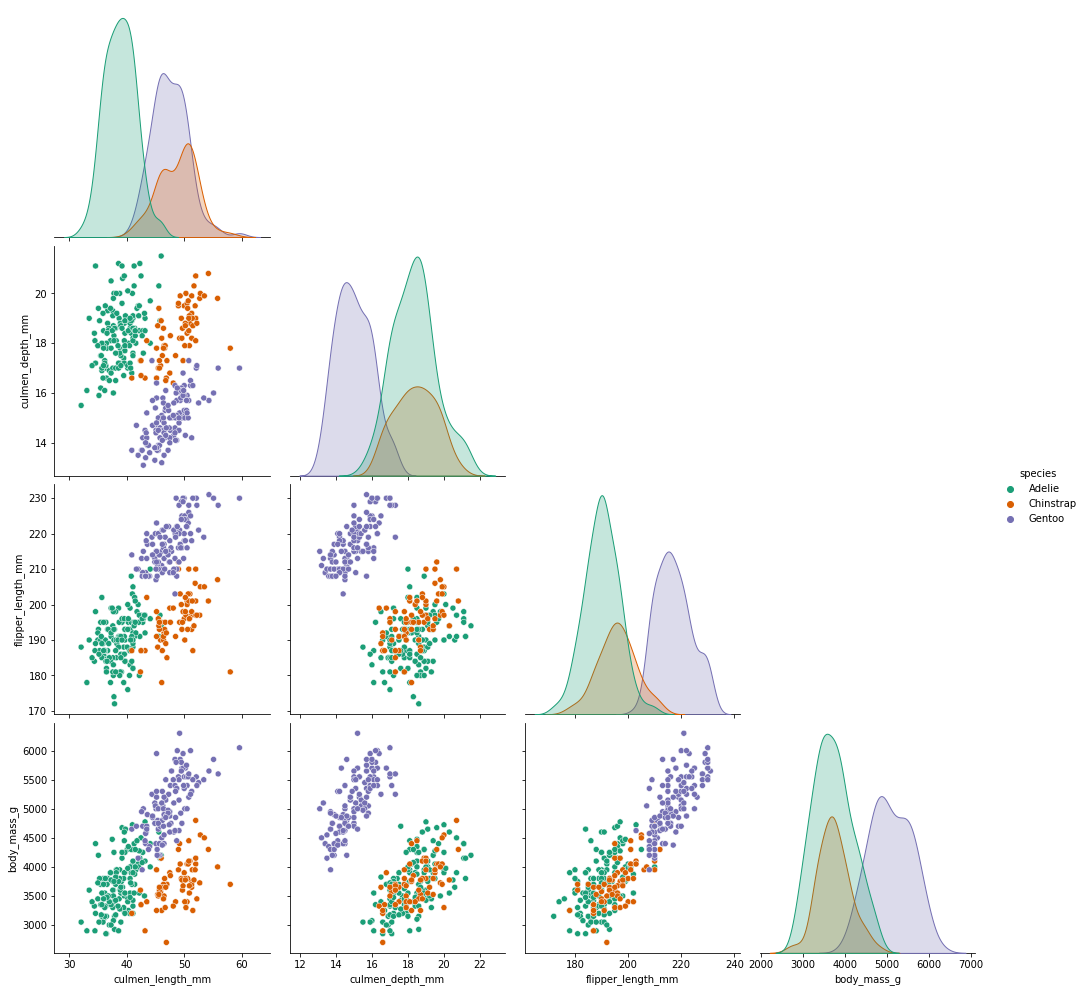

In [ ]:
sns.pairplot(df, hue='species', palette='Dark2', corner=True, height=3.5);

We can see that relationship between culment length and all 3 features are easy to distinguish.

**Note:**

* **left-skewed -> Mean < Median**

* **right-skewed -> Mean > Median**

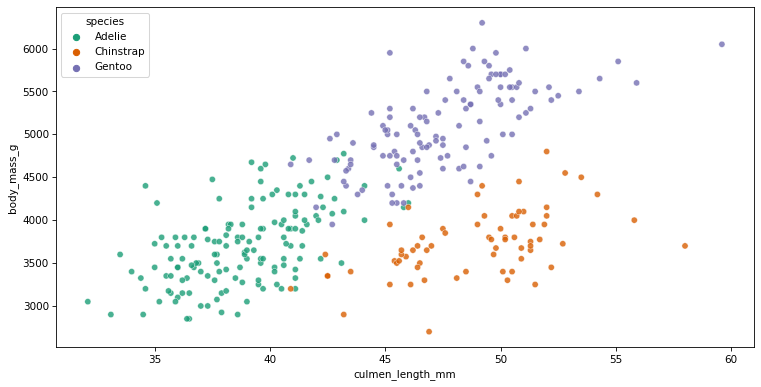

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', data=df, hue='species', palette='Dark2', alpha=0.8);

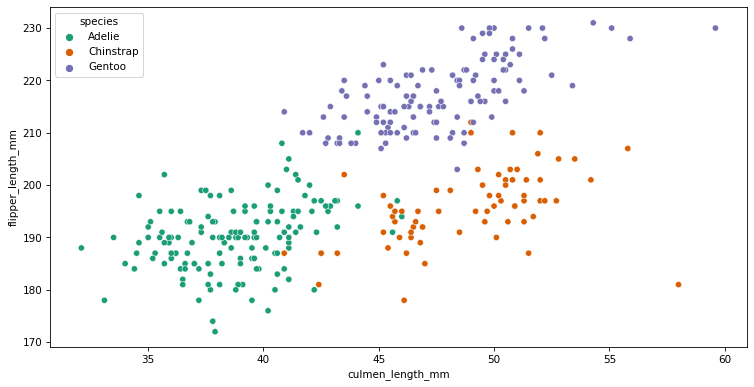

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species', palette='Dark2');

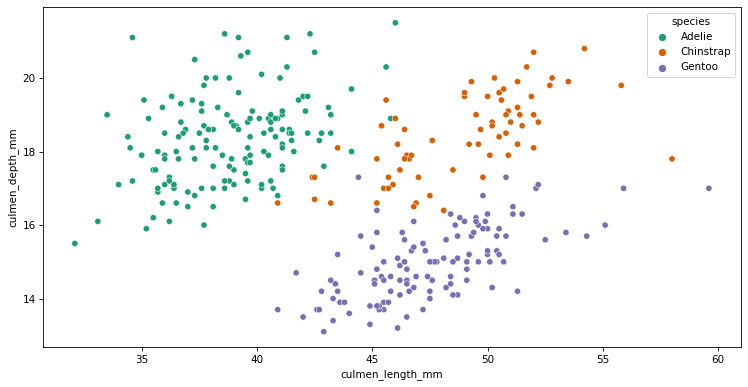

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', palette='Dark2');

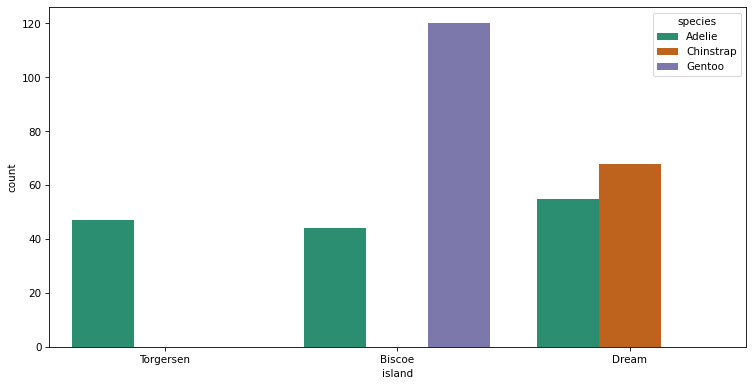

In [ ]:
plt.figure(figsize=(12,6),dpi=75)
sns.countplot(x='island', hue='species', data=df, palette='Dark2');

Based on image above, we can see that Gentoo species is only in Biscoe Island and Chinstrap species is only in Dream Island, but Adelie species is in the 3 island.

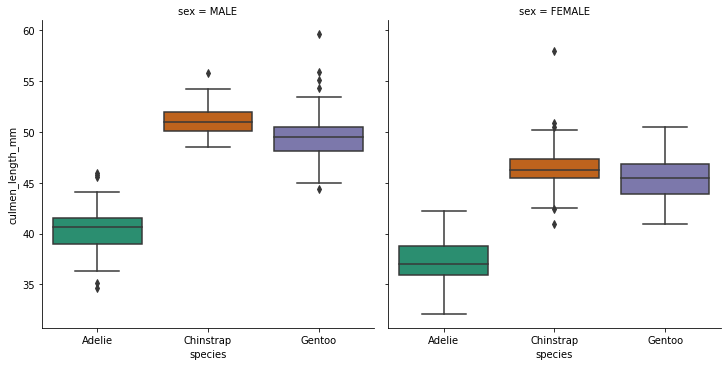

In [ ]:
sns.catplot(x='species', y='culmen_length_mm', data=df, kind='box', col='sex', palette='Dark2');

Male culment length of each species bigger than female culment length

Male Adelie and Gento species are left-skewed distribution because there are some value that far lower than the median (the tail/whisker is longer to the left/bottom of median).

Female Adelie species have right-skewed distribution but Gentoo species have left-skewed distribution.

Both male and female Chinstrap species has normal distribution.

---

### **e. Encode Categorical Features**

We will convert categorical features to numeric (except label)

In [ ]:
df = pd.get_dummies(df, columns=['island','sex'], drop_first=True)
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


In [ ]:
df.shape

(334, 8)

---

## **C. Decision Tree Classifier**

**In decision tree is it no need to scale the features because it will not use the features at the same time but will be split 1 by 1.**

### **a. Setup**

#### **Train | Test Split**

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

(233, 7)

In [ ]:
X_test.shape

(101, 7)

---

### **b. Create Estimator/Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

---

#### **Fit/Train Model**

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

---

#### **Feature Importances**

Very useful attribute of the trained model!

In [ ]:
# The imortances of features
model.feature_importances_

array([0.32352044, 0.05366774, 0.542054  , 0.00239775, 0.07836008,
       0.        , 0.        ])

In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.002398
culmen_depth_mm,0.053668
island_Dream,0.078360
culmen_length_mm,0.323520
flipper_length_mm,0.542054


Flipper Length is the most importance feature.

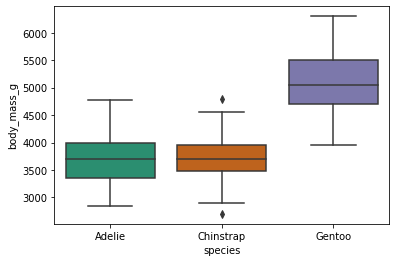

In [ ]:
sns.boxplot(x='species', y='body_mass_g', data=df, palette='Dark2');

We can see, that Adelie species is left-skewed distribution because there are some value far lower than median. Chinstrap is normal distribution and Gentoo is right-skewed distribution that means there are some value far higher than median

---

### **c. Performance Evaluation**

#### **Classification Metrics on Test Set**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
base_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, base_pred)

array([[40,  1,  0],
       [ 3, 20,  0],
       [ 0,  0, 37]])

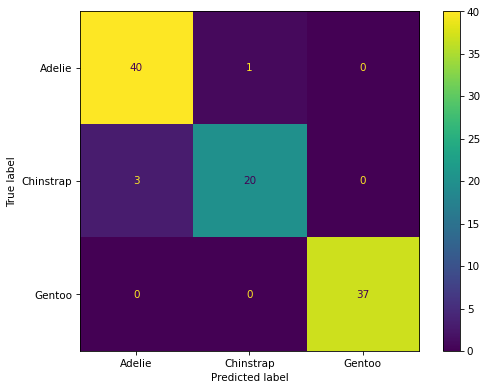

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(model, X_test, y_test, ax=ax);

In [ ]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



The model is performed pretty well

---

#### **Visualize the Tree**

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

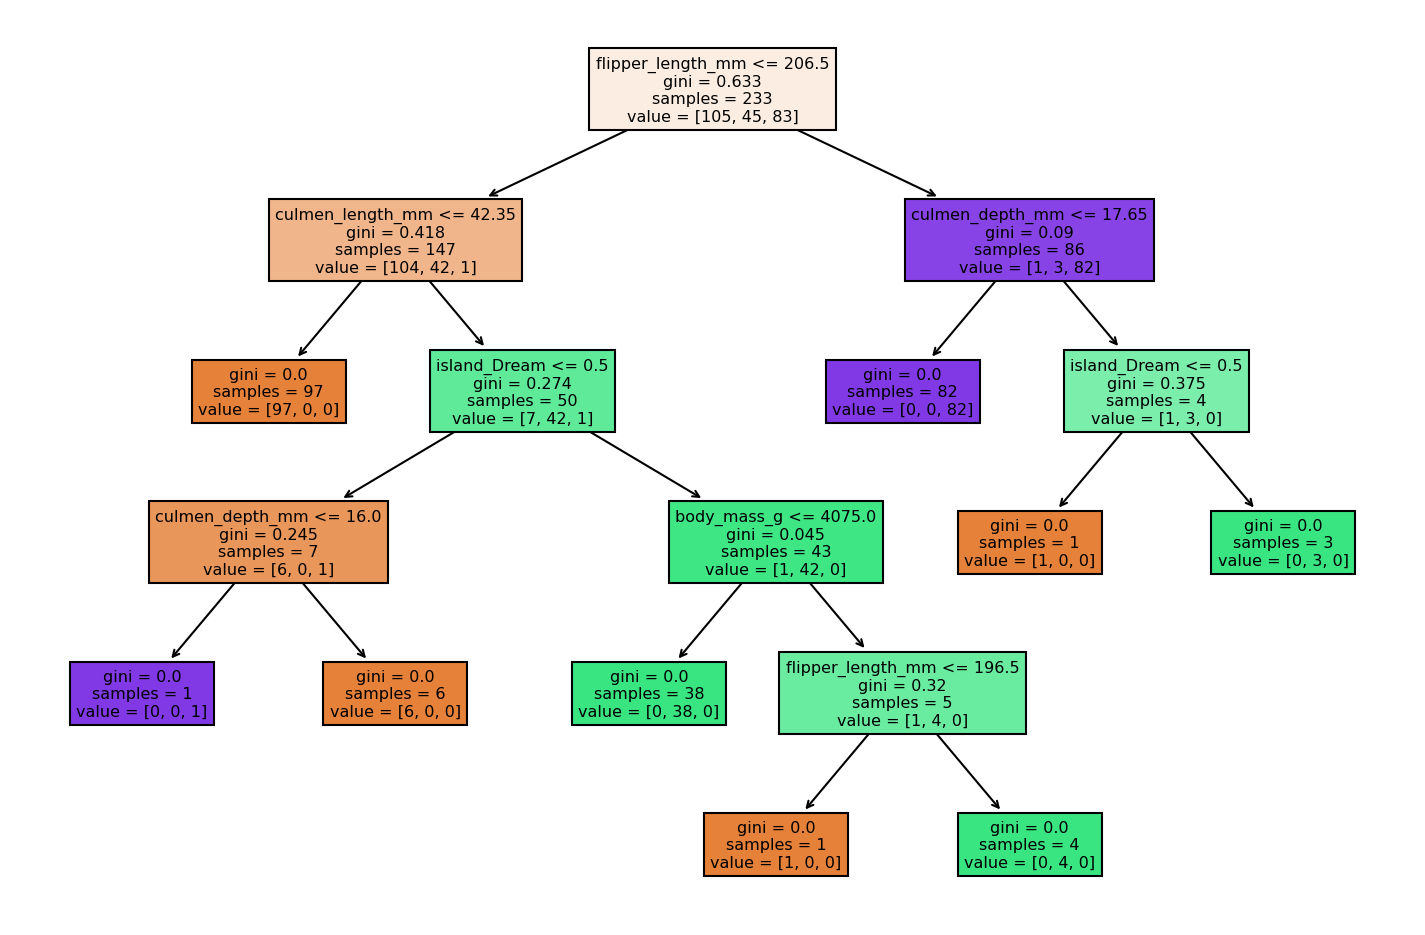

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

---

## **D. Understanding Decision Tree Hyperparameters**





To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

---

### **a. Max Depth**

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# The imortances of features
pruned_tree.feature_importances_

array([0.36076551, 0.04687931, 0.59235517, 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
pd.DataFrame(index=X.columns, data=pruned_tree.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Dream,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.046879
culmen_length_mm,0.360766
flipper_length_mm,0.592355


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





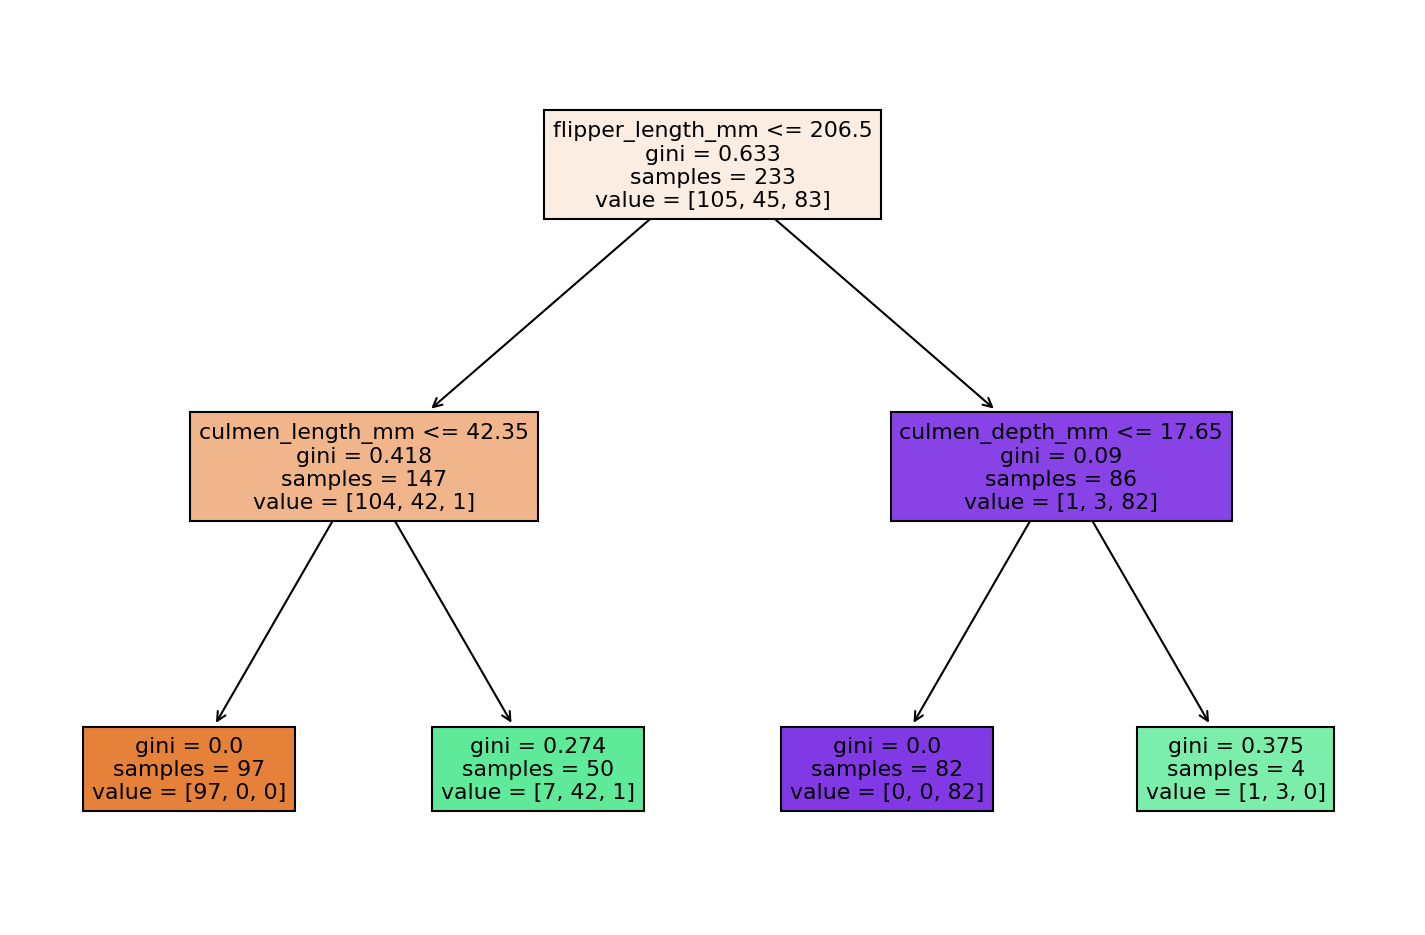

In [ ]:
report_model(pruned_tree)

---

### **b. Max Leaf Nodes**

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# The imortances of features
pruned_tree.feature_importances_

array([0.37850979, 0.        , 0.62149021, 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
pd.DataFrame(index=X.columns, data=pruned_tree.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
culmen_depth_mm,0.00000
body_mass_g,0.00000
island_Dream,0.00000
island_Torgersen,0.00000
sex_MALE,0.00000
culmen_length_mm,0.37851
flipper_length_mm,0.62149


              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





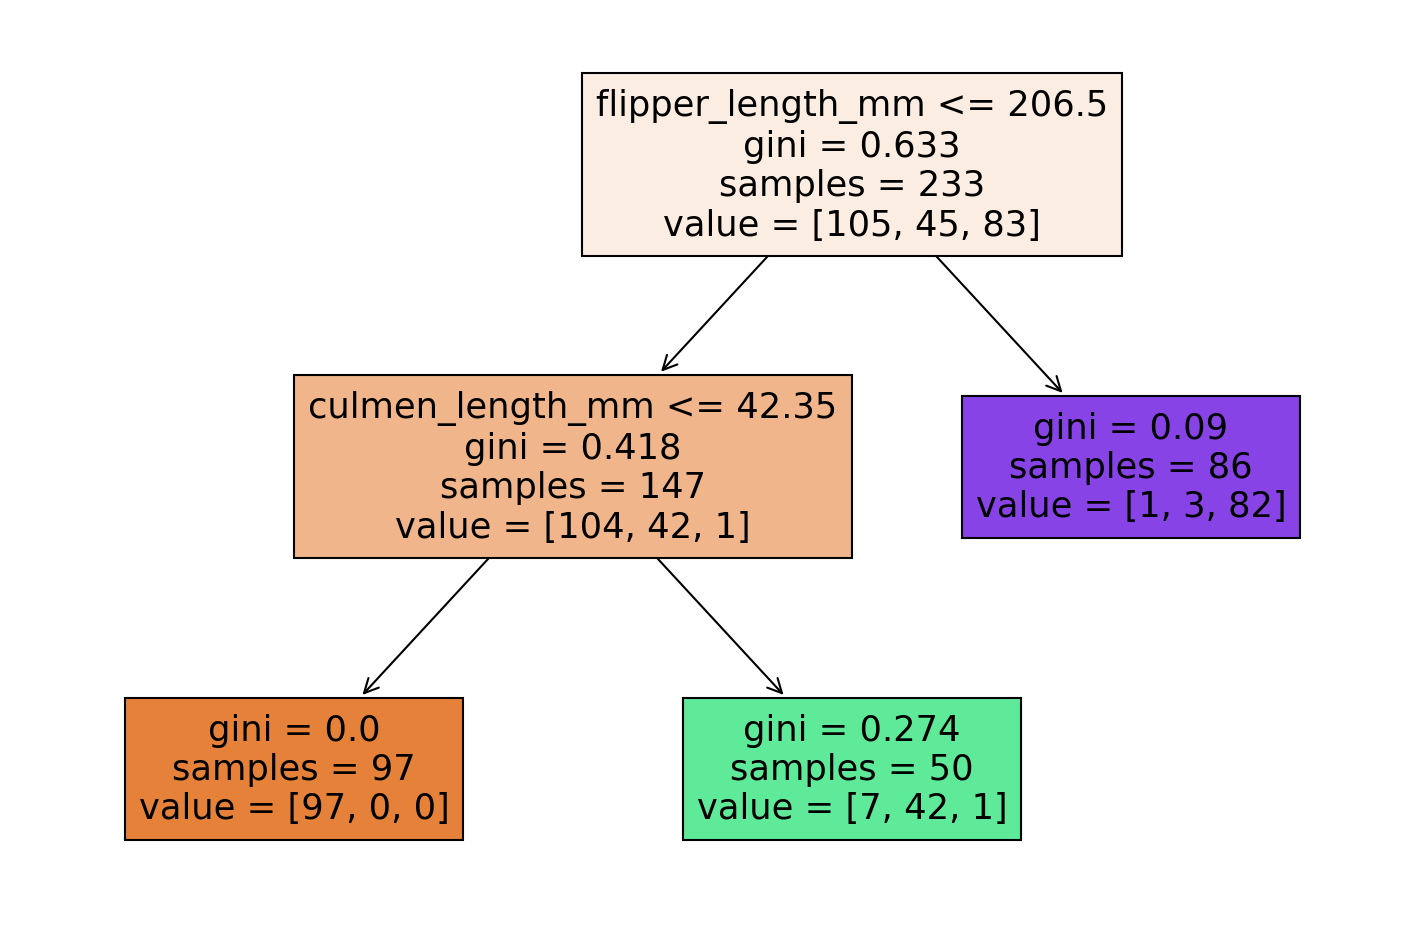

In [ ]:
report_model(pruned_tree)

### **c. Criterion**

    Information Gain = Entropy (Parent) - Weighted Average Entropy (Children)

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# The imortances of features
entropy_tree.feature_importances_

array([0.30394975, 0.06647577, 0.53969142, 0.00923507, 0.07140524,
       0.00924276, 0.        ])

In [ ]:
pd.DataFrame(index=X.columns, data=entropy_tree.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
sex_MALE,0.000000
body_mass_g,0.009235
island_Torgersen,0.009243
culmen_depth_mm,0.066476
island_Dream,0.071405
culmen_length_mm,0.303950
flipper_length_mm,0.539691


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





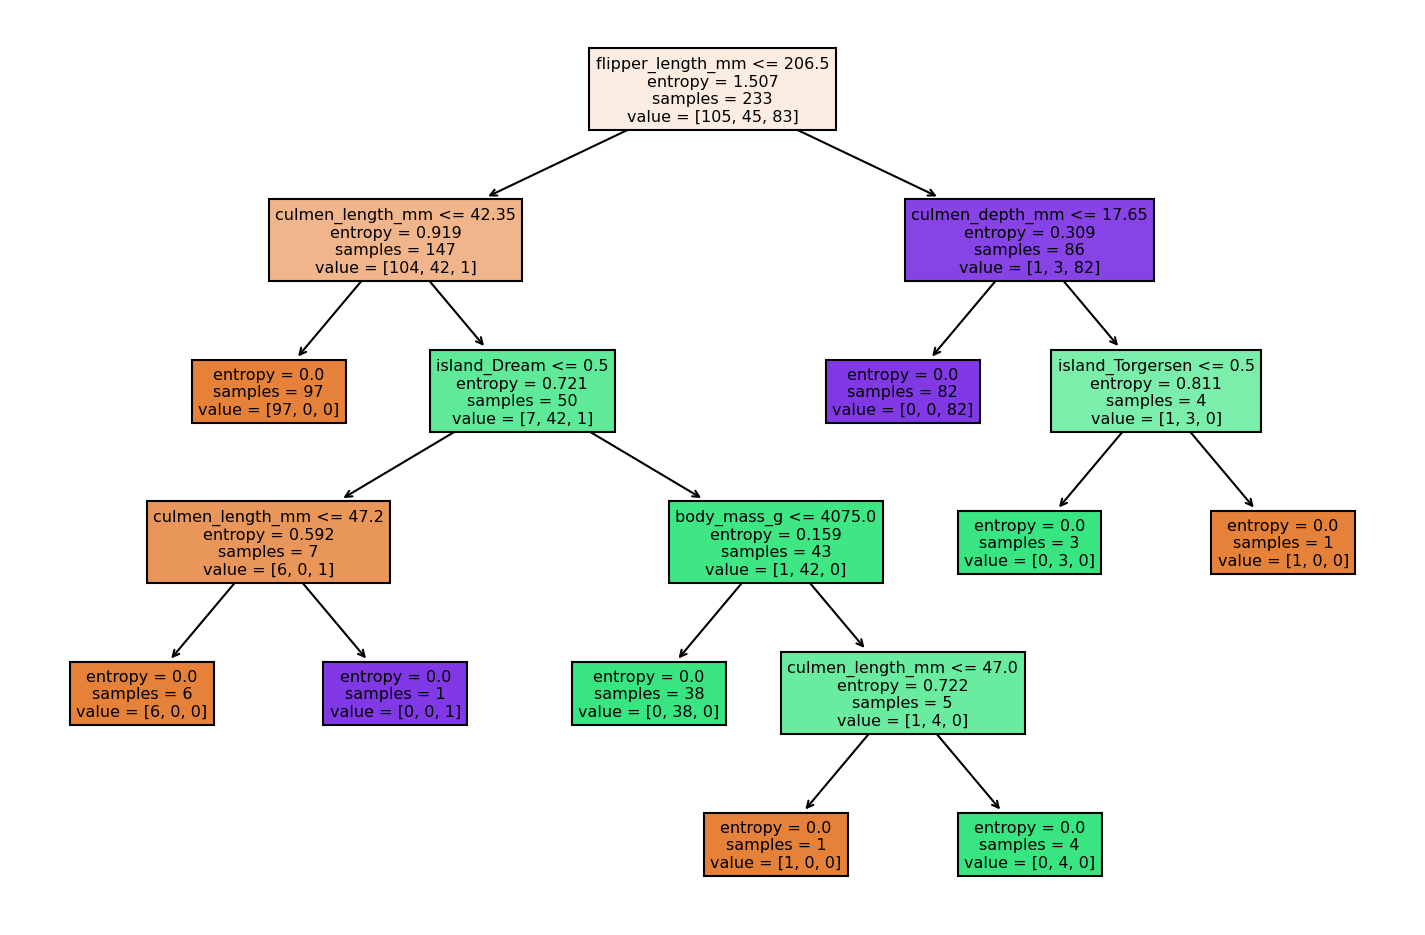

In [ ]:
report_model(entropy_tree)

---
---